# Classification

### MNIST

In [122]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [123]:
print(mnist.keys())
print([type(mnist[key]) for key in mnist.keys()])

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>, <class 'list'>, <class 'list'>, <class 'str'>, <class 'dict'>, <class 'str'>]


In [124]:
X, y = mnist["data"], mnist["target"]
# data key is a 2D array (dataframe) with 1 row per instance and 1 column per feature
# target key is a 1D array (series) with the labels for every instance
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


This means our data has 70,000 instances each with 784 features. 
There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

We need to grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function

In [125]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


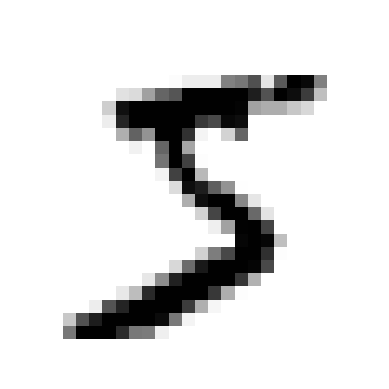

In [126]:
import matplotlib.pyplot as plt

image_vector = X.loc[0]
image = image_vector.to_numpy().reshape(28, 28)

plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()

In [127]:
print(y[0])
print(y)

5
0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Note that the label is a string. Most ML algorithms expect numbers,so let’s cast y to integer.

In [128]:
y = y.astype(int)
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64


The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [129]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:

In [130]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Quick Note: 
# new_arr = (arr == 5) will create new_arr of same length, but of boolean values, True if the value at that position is equal to 5 and vice versa

Now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an SGDClassifier and train it on the whole training set:

In [131]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [132]:
print(sgd_clf.predict([X.loc[0]]))
print(y[0] == 5)

[ True]
True


d:\programming\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


### Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. There are many performance measures available. 

#### Measuring Accuracy Using Cross-Validation

Let’s use the cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds.

In [133]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This looks like a good result. But lets look at a classifier that classifies everything into not-5.

In [140]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [141]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.
This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

#### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the fifth row and third column of the confusion matrix.
To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets.

In [142]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict()  performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).
Now time for the confusion matrix.

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Each row in a confusion matrix represents an <b>actual class</b>, while each column represents a <b>predicted class</b>. The first row of this matrix considers non-5 images (the negative class): 53,892 of them were correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,891 were wrongly classified as non-5s (false negatives), while the remaining 3,530 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

In [145]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier 

precision = TP / (TP + FP)

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). But this would not be very useful, since the classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or the true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier

recall = TP / (TP + FN)

#### Precision and Recall

In [146]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall. 
Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

F1 = 2 / ((1 / precision) + (1 / recall))   
= 2 * ((precision) * (recall)) / ((precision) + (recall))  
= TP / (TP + (FN + FP) / 2) 

To compute the F1 score, simply call the f1_score() function:

In [147]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) 

0.7325171197343847

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall. 
For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters in surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught).
Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.

#### Precision/Recall Trade-off

To understand this trade-off, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class. 

If this threshold is big, number of False Positives will decrease and number of False Negatives will increase and vice cersa.
This means greater threshold will result greater precision less recall and lesser threshold will result lesser precision more recall.

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, instead of the prediction. Then, you can use any threshold you want to make predictions based on those scores:

In [149]:
y_scores = sgd_clf.decision_function([X.loc[0]])
print(y_scores)
threshold = 0
y_pred = (y_scores > threshold)
print(y_pred)

[2164.22030239]
[ True]


d:\programming\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [159]:
threshold = 3000
y_pred = (y_scores > threshold)
print(y_pred)

[False False False ...  True False False]


How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [160]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Use these scores to compute precision and recall for all possible thresholds.  
Then use the data of precision and recall for thresholds to plot graphs to analyze what value would be best.

In [161]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

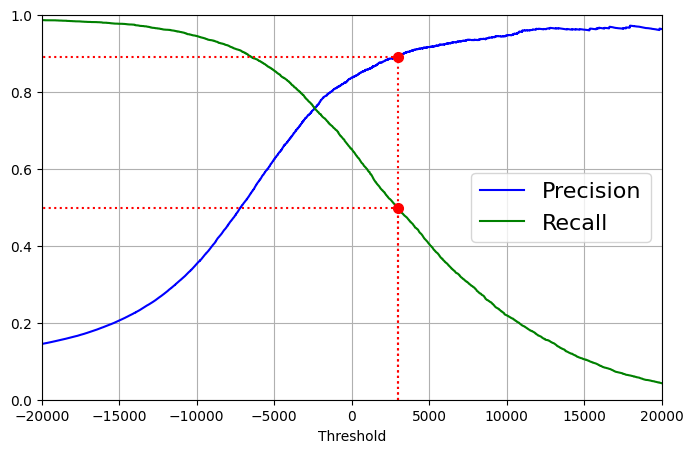

In [162]:
thresholds_plot = [3000]
indexes = [np.argmin(np.abs(thresholds - i)) for i in thresholds_plot]

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8,5))
    plt.grid(True)
    plt.xlabel("Threshold")
    plt.axis([-20000, 20000, 0, 1])
    
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

    for x, y in zip(thresholds_plot, indexes):
        plt.plot(x, precisions[y], "ro", markersize=7)
        plt.vlines(x, 0, precisions[y], colors="red", linestyles="dotted")
        plt.hlines(precisions[y], thresholds[0], x,  colors="red", linestyles="dotted")

        plt.plot(x, recalls[y], "ro", markersize=7)
        plt.vlines(x, 0, recalls[y],  colors="red", linestyles="dotted")
        plt.hlines(recalls[y], thresholds[0], x, colors="red", linestyles="dotted")
    
    plt.legend(loc="center right", fontsize=16)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


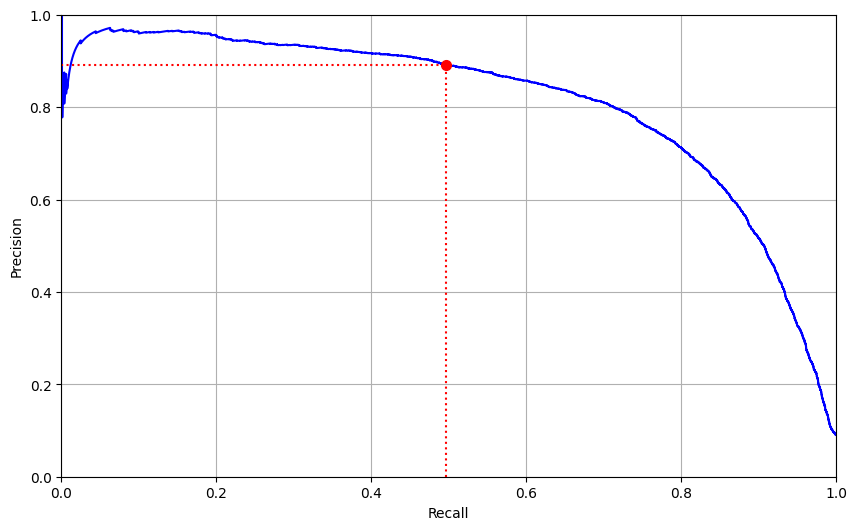

In [163]:
thresholds_plot = [3000]
indexes = [np.argmin(np.abs(thresholds - i)) for i in thresholds_plot]

plt.figure(figsize = (10,6))
plt.grid(True)
plt.plot(recalls, precisions, "b-")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall")
plt.ylabel("Precision")

for i in indexes:
    plt.plot(recalls[i], precisions[i], "ro", markersize=7)
    plt.vlines(recalls[i], 0, precisions[i], colors="red", linestyles="dotted")
    plt.hlines(precisions[i], 0, recalls[i],  colors="red", linestyles="dotted")

You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall. But of course, the choice depends on your project.

Suppose you decide to aim for 80% precision. You look up the first plot and find that you need to use a threshold of about -1,500. To be more precise you can search for the lowest threshold that gives you at least 80% precision

In [173]:
np.argmax(precisions >= 0.80)

np.int64(55170)

In [174]:
threshold_for_80_p = thresholds[np.argmax(precisions >= 0.80)]
threshold_for_80_p

np.float64(-1328.41257665624)

To make predictions, instead of calling the classifier's predict method, now you can run this code:

In [175]:
y_train_pred_80_p = (y_scores >= threshold_for_80_p)

In [176]:
print(precision_score(y_train_5, y_train_pred_80_p))
print(recall_score(y_train_5, y_train_pred_80_p))
print(f1_score(y_train_5, y_train_pred_80_p))

0.8
0.7127836192584394
0.7538776704711735


Great, you have a 80% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. But wait, not so fast. A high-precision classifier is not very useful if its
recall is too low!

#### The ROC Curve